In [19]:
# import section

import importlib
import EDA
importlib.reload(EDA)

import pandas as pd

000000000000000000TEST


Numer of null values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Data types:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


Number of duplicate rows:  (3854, 9)


Number of unique values in each column:

gender: 2 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values
             age  hypertension  he

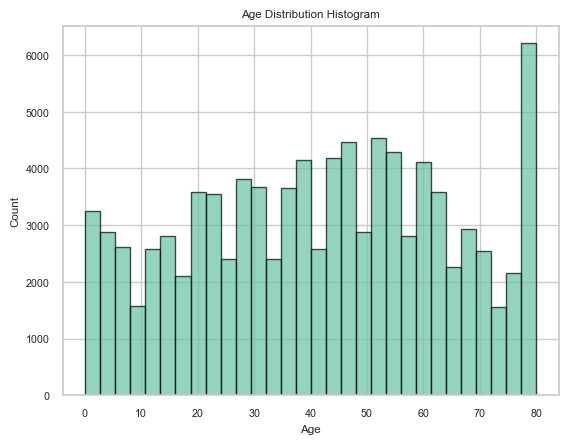

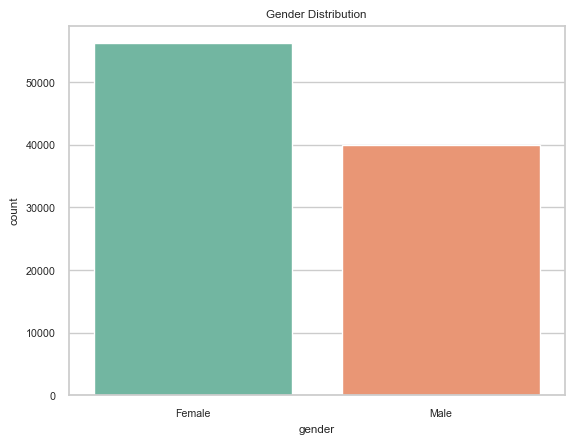

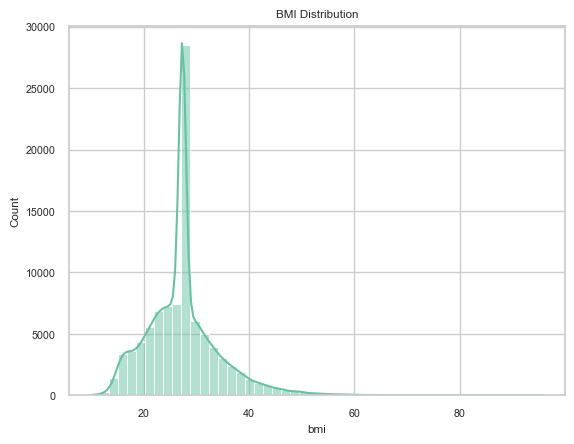

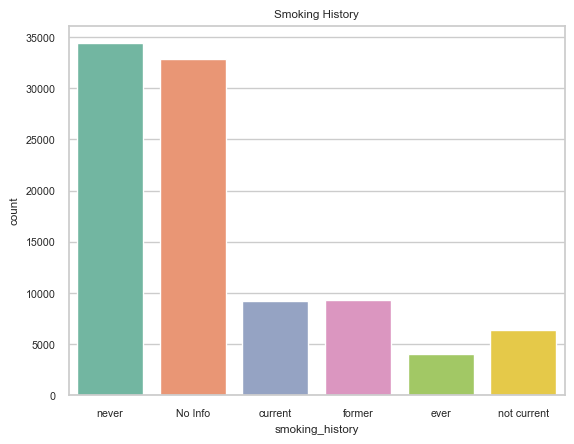

smoking_history
non-smoker     70902
past_smoker    19794
current         9286
Name: count, dtype: int64

<<<<<<df1 head>>>>>

      age  hypertension  heart_disease     bmi  HbA1c_level  \
0 80.0000             0              1 25.1900       6.6000   
1 54.0000             0              0 27.3200       6.6000   
2 28.0000             0              0 27.3200       5.7000   
3 36.0000             0              0 23.4500       5.0000   
4 76.0000             1              1 20.1400       4.8000   

   blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                  140         0           True        False   
1                   80         0           True        False   
2                  158         0          False         True   
3                  155         0           True        False   
4                  155         0          False         True   

   smoking_history_current  smoking_history_non-smoker  \
0                    False                        T

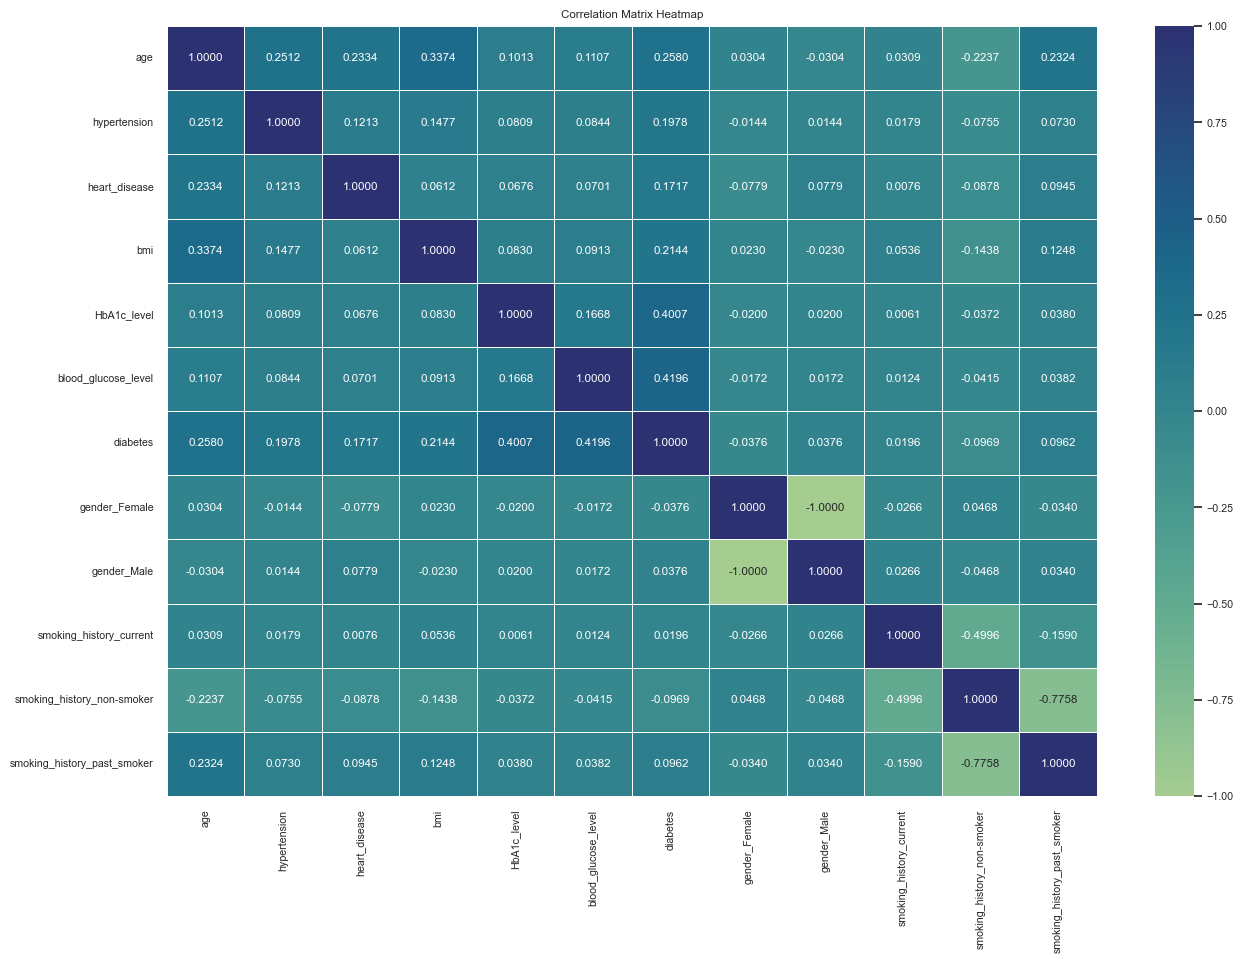

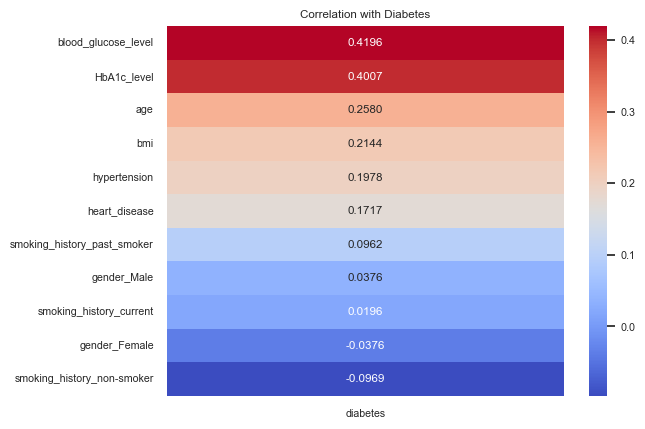

In [20]:
def main():
    df = pd.read_csv(r"C:\Users\user0\Documents\BPP\DSPD\Summative\DS\DiabetesDS.csv")
    # Remove Unneccessary value
    df = df[df['gender'].isin(['Male', 'Female'])]

    EDA.analyse_data(df, "diabetes")

    # Apply the function to the 'smoking_history' column
    df['smoking_history'] = df['smoking_history'].apply(EDA.smoking_categories)
    # Check the new value counts
    print(df['smoking_history'].value_counts())

    df1 = df.copy()
    # Perform one-hot encoding on the gender and smoking_history variable
    df1 = EDA.one_hot_encoding(df1, 'gender')
    df1 = EDA.one_hot_encoding(df1, 'smoking_history')

    # check the up to date version of the dataframe
    print("\n<<<<<<df1 head>>>>>\n")
    print(df1.head()) 
    
    EDA.cor_matrix(df1)










if __name__ == "__main__":
    main()
